GIF GEnerated


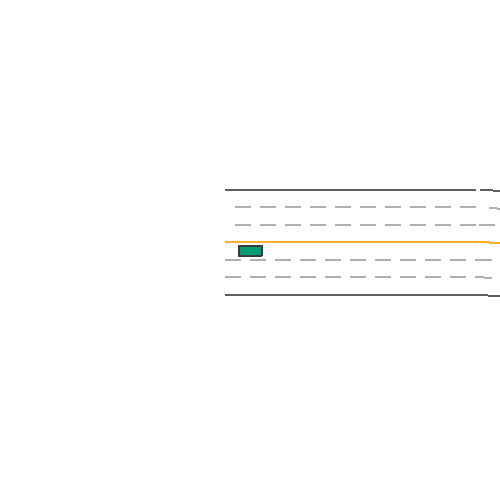

In [ ]:
from metadrive import MetaDriveEnv
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from stable_baselines3 import PPO
from stable_baselines3.common.vec_env import SubprocVecEnv, DummyVecEnv
from stable_baselines3.common.monitor import Monitor
from stable_baselines3.common.utils import set_random_seed
from stable_baselines3.common.callbacks import EvalCallback
from functools import partial
import re

from metadrive.engine.engine_utils import close_engine
close_engine()

os.environ['SDL_VIDEODRIVER'] = "dummy"

env_config = dict(
        map='C',
        discrete_action=True,
        discrete_throttle_dim=3,
        discrete_steering_dim=3,
        horizon=1000,
        random_spawn_lane_index=False,
        num_scenarios=1,
        start_seed=0,
        traffic_density=0.0,
        accident_prob=0,
        log_level=50
    )

env = MetaDriveEnv(env_config)

model_path="models/PPO/best_model.zip"
model = PPO.load(model_path)
obs, _ = env.reset()

for _ in range(5000):
    action, _ = model.predict(obs,deterministic=True)
    obs, _, done, _, _ = env.step(action)
    env.render(mode="top_down",screen_record=True,screen_size=(500,500))
    if done:
        obs, _ = env.reset()
print('GIF GEnerated')
env.top_down_renderer.generate_gif()
os.rename("demo.gif", "ppo.gif")
env.close()

from IPython.display import Image
Image(open("ppo.gif", 'rb').read())

/home/ash/ash/lib/python3.12/site-packages/stable_baselines3/common/save_util.py:167: UserWarning: Could not deserialize object _last_obs. Consider using `custom_objects` argument to replace this object.
Exception: 'numpy.ufunc' object has no attribute '__module__'
  warnings.warn(
/home/ash/ash/lib/python3.12/site-packages/stable_baselines3/common/save_util.py:167: UserWarning: Could not deserialize object _last_episode_starts. Consider using `custom_objects` argument to replace this object.
Exception: 'numpy.ufunc' object has no attribute '__module__'
  warnings.warn(


Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
GIF GEnerated


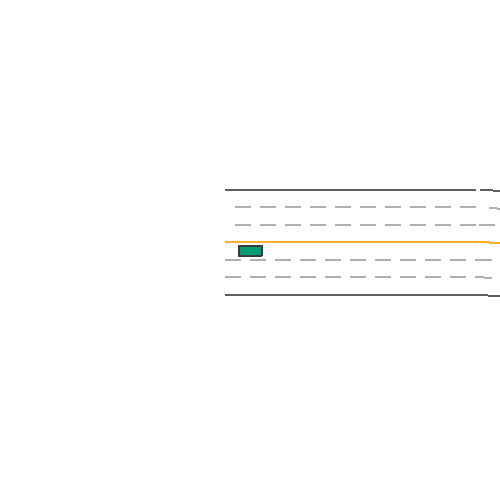

In [ ]:
from metadrive import MetaDriveEnv
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from stable_baselines3 import PPO
from sb3_contrib import TRPO
from stable_baselines3 import DQN
from stable_baselines3.common.vec_env import SubprocVecEnv, DummyVecEnv
from stable_baselines3.common.monitor import Monitor
from stable_baselines3.common.utils import set_random_seed
from stable_baselines3.common.callbacks import EvalCallback
from functools import partial
import re
from metadrive.engine.engine_utils import close_engine
close_engine()
os.environ['SDL_VIDEODRIVER'] = "dummy"

env_config = dict(
        map='C',
        discrete_action=True,
        discrete_throttle_dim=3,
        discrete_steering_dim=3,
        horizon=1000,
        random_spawn_lane_index=False,
        num_scenarios=1,
        start_seed=0,
        traffic_density=0.0,
        accident_prob=0,
        log_level=50
    )

env = MetaDriveEnv(env_config)

model_path="models/TRPO/best_model.zip"
model = TRPO.load(model_path, env=env, custom_objects={"observation_space": env.observation_space,
                    "action_space": env.action_space})
obs, _ = env.reset()

for _ in range(500):
    action, _ = model.predict(obs, deterministic=True)
    obs, _, done, _, _ = env.step(action)
    env.render(mode="top_down",screen_record=True,screen_size=(500,500))
    if done:
        obs, _ = env.reset()
print('GIF GEnerated')
env.top_down_renderer.generate_gif()
env.close()

os.rename("demo.gif", "trpo.gif")

from IPython.display import Image
Image(open("trpo.gif", 'rb').read())